<a href="https://colab.research.google.com/github/AnshulJagotra/Stock-Market-Data-Analysis-Prediction/blob/main/Advance_Stock_Market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
# Stock tickers
tickers = ['AAPL', 'GOOGL']

# Download data for the last 5 years
data = yf.download(tickers, period='5y', auto_adjust=True)

# Select the 'Close' price for each ticker
data = data['Close']

print("Downloaded Data (Closing Price):")
print(data.head())

[*********************100%***********************]  2 of 2 completed

Downloaded Data (Closing Price):
Ticker            AAPL      GOOGL
Date                             
2020-08-26  123.070694  81.716415
2020-08-27  121.599449  80.940582
2020-08-28  121.402466  81.482826
2020-08-31  125.519508  80.990776
2020-09-01  130.519257  82.260658


In [26]:
import pandas as pd
import yfinance as yf

# Yahoo Finance se AAPL ka data lein
data = yf.download("AAPL", start="2020-01-01", end="2025-01-01")

# AAPL data ko DataFrame mein copy karein
aapl = data.copy()

# Simple Moving Averages (SMA)
aapl['SMA_50'] = aapl['Close'].rolling(window=50).mean()
aapl['SMA_200'] = aapl['Close'].rolling(window=200).mean()

# Daily Returns
aapl['Daily_Return'] = aapl['Close'].pct_change()

# Bollinger Bands
window_size = 20
aapl['SMA'] = aapl['Close'].rolling(window=window_size).mean()
aapl['Std_Dev'] = aapl['Close'].rolling(window=window_size).std()
aapl['Upper_BB'] = aapl['SMA'] + (aapl['Std_Dev'] * 2)
aapl['Lower_BB'] = aapl['SMA'] - (aapl['Std_Dev'] * 2)

# NaN values hatayein
aapl.dropna(inplace=True)

print("AAPL Data with Indicators:")
print(aapl.head())



/tmp/ipython-input-2657724994.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

AAPL Data with Indicators:
Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2020-10-15  117.416771  117.893401  114.926616  115.481064  112559200   
2020-10-16  115.772850  118.233832  115.568580  117.971194  115393800   
2020-10-19  112.815819  117.134681  112.504549  116.687232  120639300   
2020-10-20  114.304070  115.733966  112.475355  113.029804  124423700   
2020-10-21  113.681526  115.471323  113.272979  113.486978   89946000   

Price           SMA_50    SMA_200 Daily_Return         SMA   Std_Dev  \
Ticker                                                                 
Date                                                                   
2020-10-15  113.729093  85.965763    -0.003961  111.624230  4.626686   
2020-10-16  113.832638  86.181935    -0.014001  112.216615  4.338538   
2020-10-19  113.927333  86.3

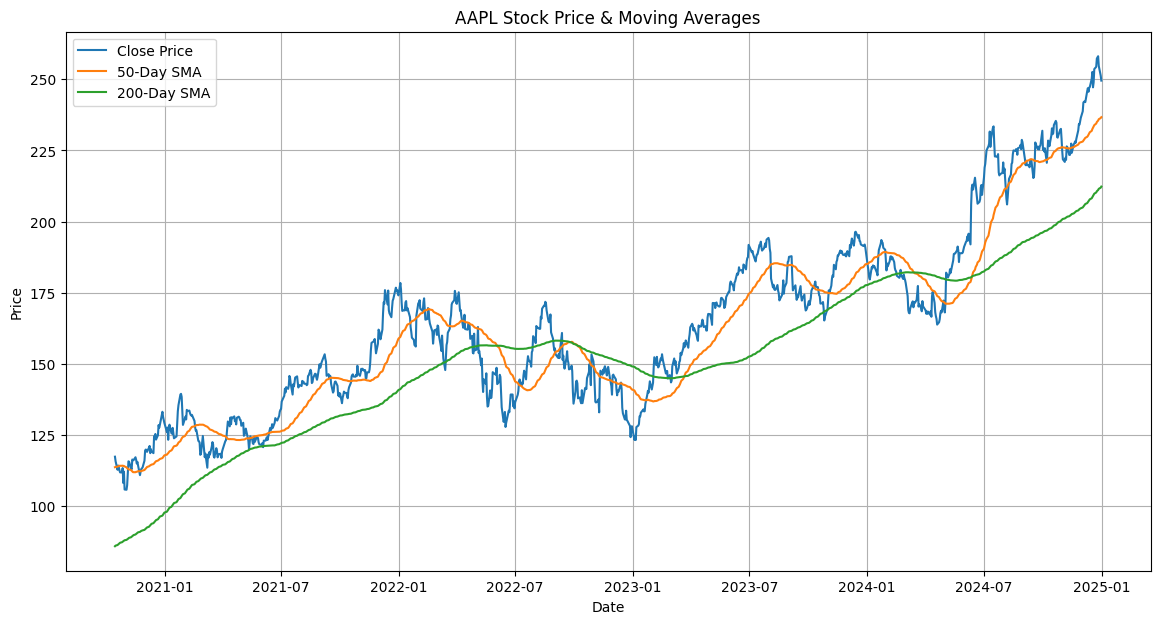

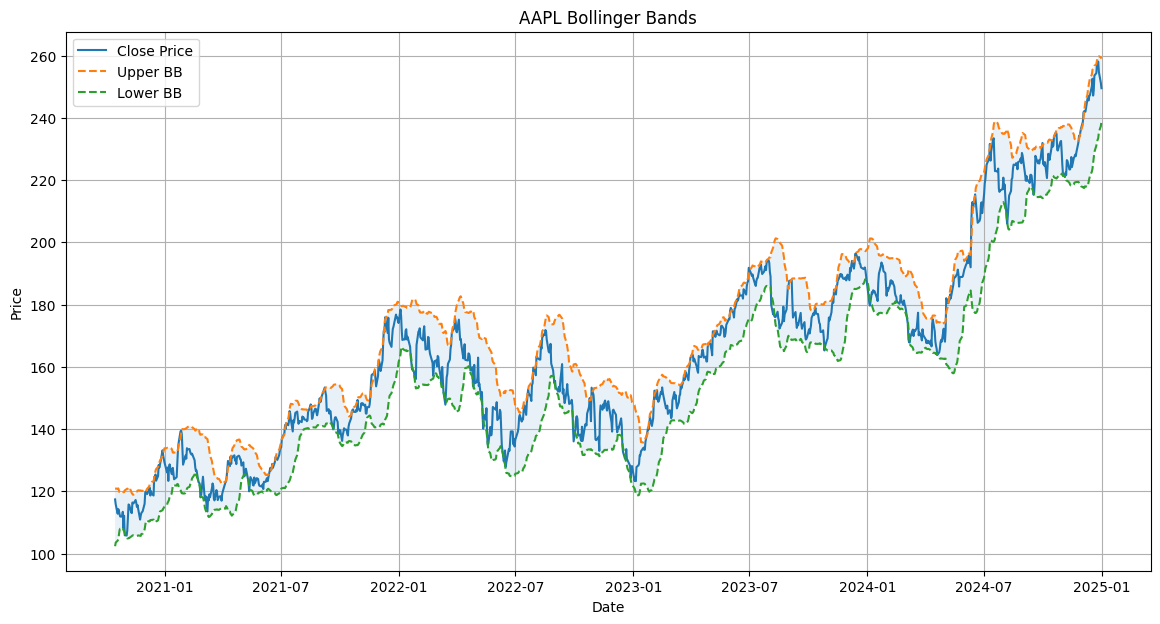

In [27]:
# Close Price aur Moving Averages plot karein
plt.figure(figsize=(14, 7))
plt.plot(aapl['Close'], label='Close Price')
plt.plot(aapl['SMA_50'], label='50-Day SMA')
plt.plot(aapl['SMA_200'], label='200-Day SMA')
plt.title('AAPL Stock Price & Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Bollinger Bands plot karein
plt.figure(figsize=(14, 7))
plt.plot(aapl['Close'], label='Close Price')
plt.plot(aapl['Upper_BB'], label='Upper BB', linestyle='--')
plt.plot(aapl['Lower_BB'], label='Lower BB', linestyle='--')
plt.fill_between(aapl.index, aapl['Lower_BB'], aapl['Upper_BB'], alpha=0.1)
plt.title('AAPL Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


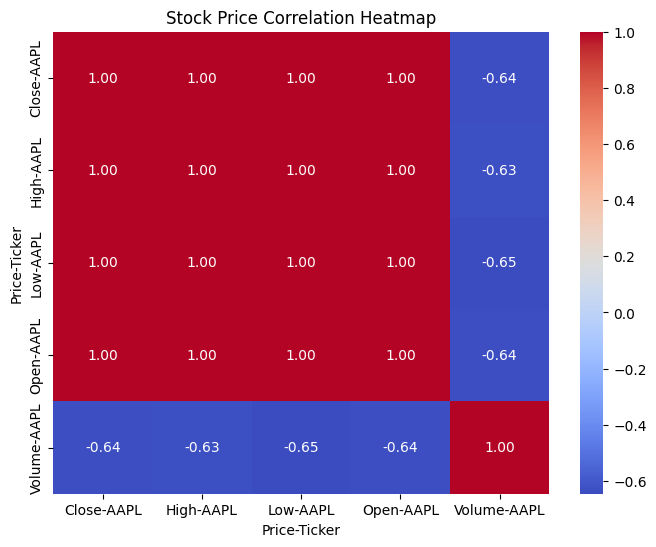

In [28]:
# Correlation matrix calculate karein
correlation_matrix = data.corr()

# Correlation heatmap plot karein
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Stock Price Correlation Heatmap')
plt.show()

Mean Squared Error (MSE): 40.93


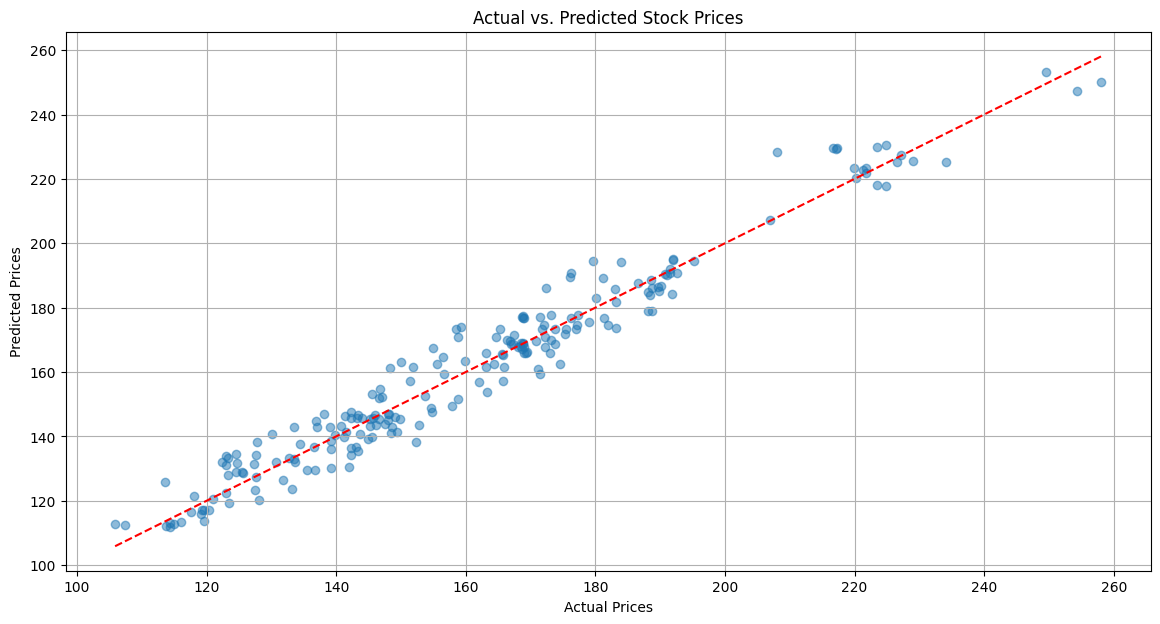

In [30]:
# Future price ko target variable banayein (1 din aage ka price)
aapl['Future_Price'] = aapl['Close'].shift(-1)
aapl.dropna(inplace=True)

# Features (X) aur Target (y) define karein
X = aapl[['SMA_50', 'SMA_200', 'SMA', 'Upper_BB', 'Lower_BB']].values
y = aapl['Future_Price'].values

# Data ko training aur testing set mein split karein
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model train karein
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions karein
predictions = model.predict(X_test)

# Model ki performance evaluate karein
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Predictions aur actual values plot karein
plt.figure(figsize=(14, 7))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Stock Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()
